### Import required libraries

In [ ]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading & Reading Data

In [ ]:
# Read The Dataset
df = pd.read_csv("master.csv")

In [ ]:
df.shape

(27820, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [ ]:
# Drop the 'HDI for year', 'country-year' columns
df.drop(["HDI for year", "country-year"], axis='columns', inplace=True)

In [ ]:
# Show Columns
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', ' gdp_for_year ($) ', 'gdp_per_capita ($)',
       'generation'],
      dtype='object')

In [ ]:
# Rename Columns
df=df.rename(columns={'country':'Country','year':'Year','sex':'Gender','age':'Age','suicides_no':'SuicidesNo','population':'Population','suicides/100k pop':'Suicides100kPop',' gdp_for_year ($) ':'GdpForYear_$','gdp_per_capita ($)':'GdpPerCapital_$','generation':'Generation'})

In [ ]:
# Edit the Certain Value "5-14" ---> "05-14"
df["Age"] = df["Age"].str.replace("5-14 years","05-14 years")

In [ ]:
# Change The data
df["GdpForYear_$"] = df["GdpForYear_$"].str.replace(",", "").astype(np.int64)



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          27820 non-null  object 
 1   Year             27820 non-null  int64  
 2   Gender           27820 non-null  object 
 3   Age              27820 non-null  object 
 4   SuicidesNo       27820 non-null  int64  
 5   Population       27820 non-null  int64  
 6   Suicides100kPop  27820 non-null  float64
 7   GdpForYear_$     27820 non-null  int64  
 8   GdpPerCapital_$  27820 non-null  int64  
 9   Generation       27820 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 2.1+ MB


In [ ]:
df.describe()

,Year,SuicidesNo,Population,Suicides100kPop,GdpForYear_$,GdpPerCapital_$
count,27820.000000,27820.000000,2.782000e+04,27820.000000,2.782000e+04,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,4.455810e+11,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,1.453610e+12,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,4.691962e+07,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,8.985353e+09,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,4.811469e+10,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,2.602024e+11,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,1.812071e+13,126352.000000


In [ ]:
# Summary Statistics for categorical variables
df.describe(exclude="number")

,Country,Gender,Age,Generation
count,27820,27820,27820,27820
unique,101,2,6,6
top,Mauritius,male,15-24 years,Generation X
freq,382,13910,4642,6408


# Visulization Section

In [ ]:
numeric_columns= df.select_dtypes(exclude=['object'])

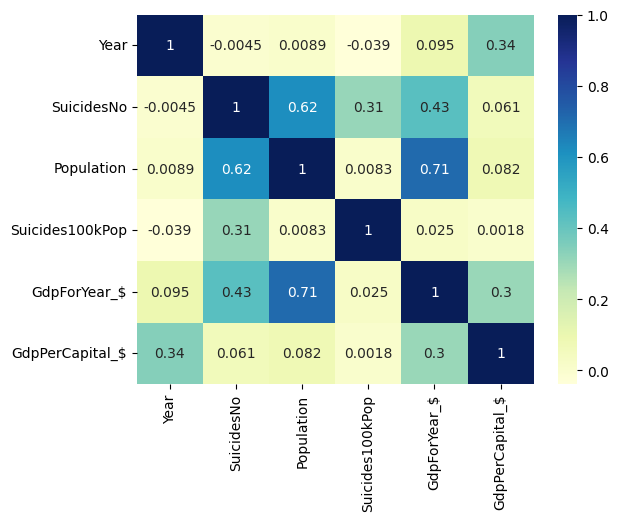

In [ ]:
sns.heatmap(numeric_columns.corr(),cmap='YlGnBu',annot=True)
plt.show()

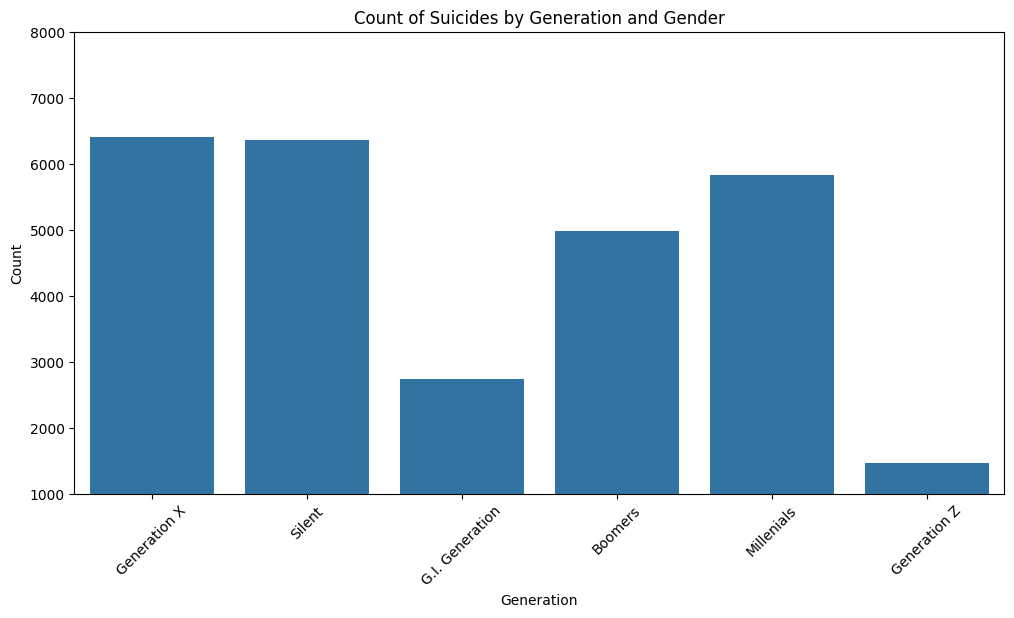

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Generation",  data=df)
plt.ylim(ymin = 1000, ymax= 8000)
plt.xticks(rotation=45)
plt.title('Count of Suicides by Generation and Gender')
plt.xlabel('Generation')
plt.ylabel('Count')
plt.show()

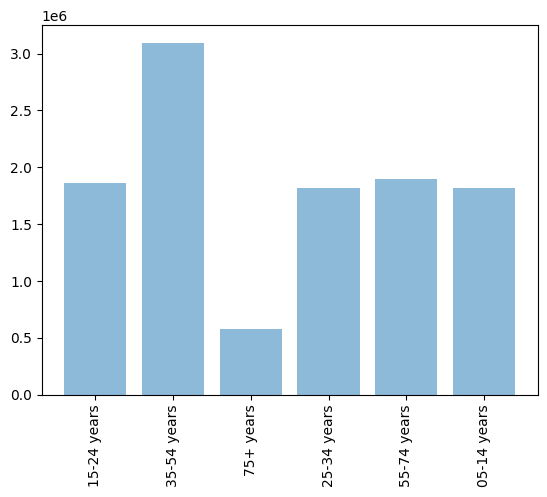

In [ ]:
index_population=[]
for age in df['Age'].unique():
    index_population.append(sum(df[df['Age']==age].Population)/len(df[df['Age']==age].Population))

plt.bar(['15-24 years','35-54 years','75+ years','25-34 years','55-74 years','05-14 years'],index_population,align='center',alpha=0.5)
plt.xticks(rotation=90)
plt.show()

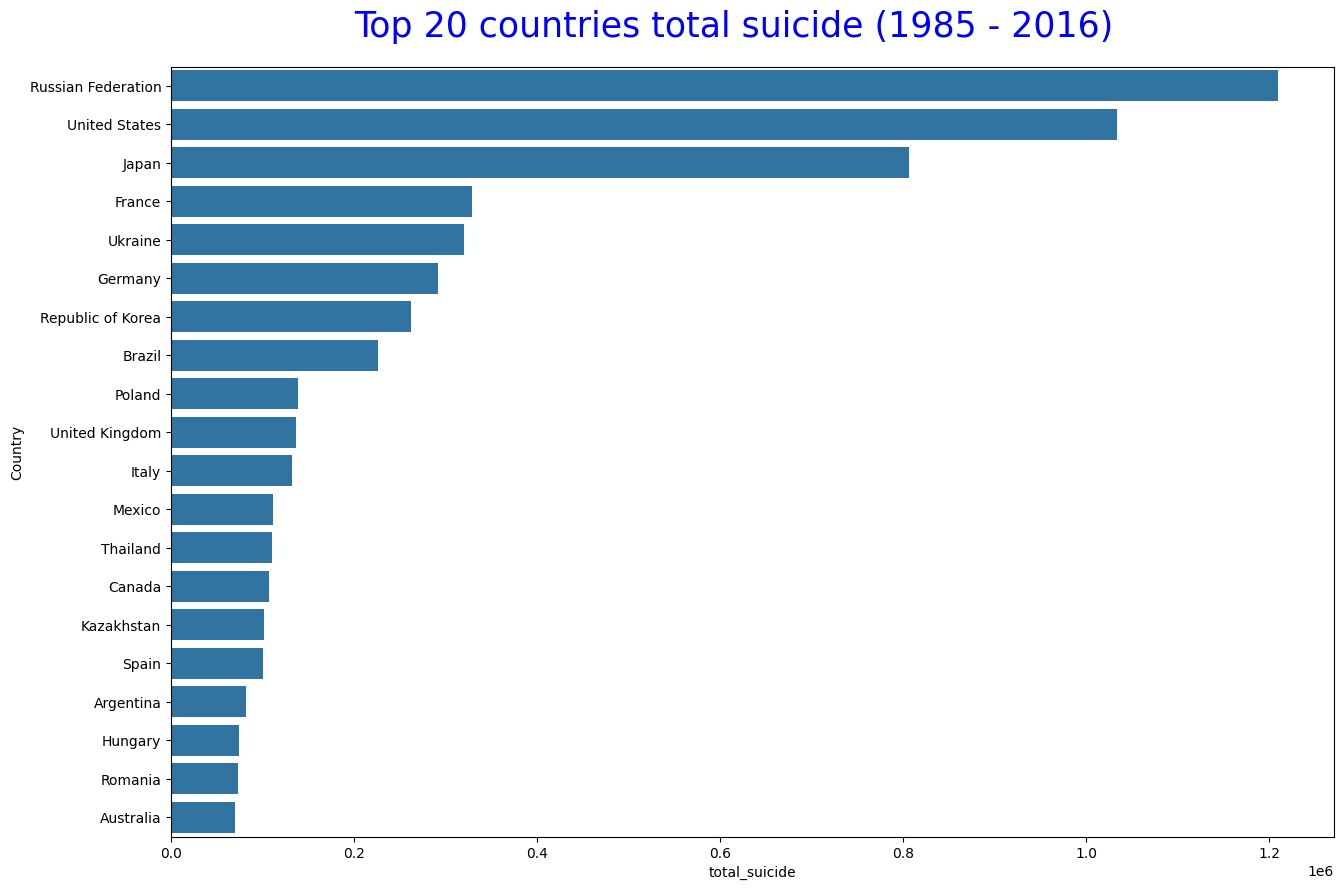

In [ ]:
# Finding Sum For Each Country "Group By Country"
group_country_total = df.groupby(by=['Country']).agg({'SuicidesNo': ['sum']})

group_country_total.columns = ['total_suicide']

group_country_total.reset_index(inplace=True)

group_country_total = group_country_total.sort_values(by=['total_suicide'], ascending=False).head(20)



plt.figure(figsize=(15, 10))


# Set x, y axis
sns.barplot(x='total_suicide', y='Country', data = group_country_total)

# Format Title Of Chart
plt.figtext(.5,.91,'Top 20 countries total suicide (1985 - 2016)', color='b', fontsize=25, ha='center')

# Showing Figure
plt.show()

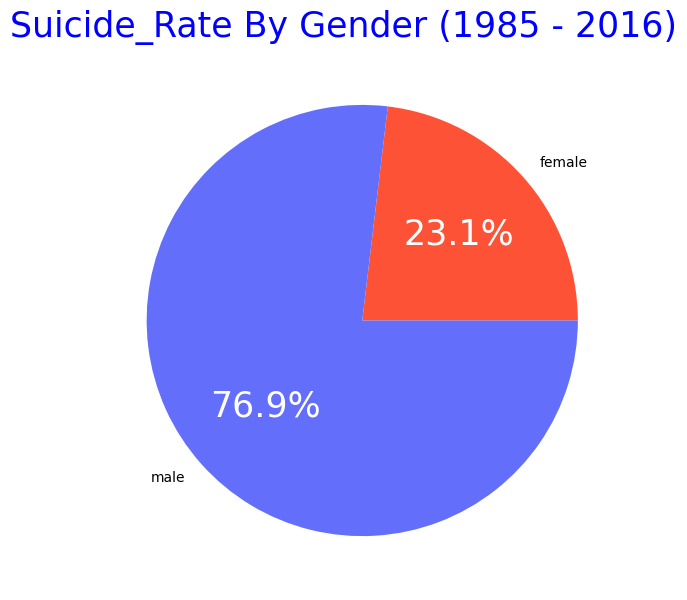

In [ ]:
# Finding Sum For Each Gender "Group By Gender"
group_gender_total = df.groupby(by=['Gender']).agg({"SuicidesNo": ['sum']})


group_gender_total.columns = ['total_suicide']

group_gender_total.reset_index(inplace=True)



fig1, ax1 = plt.subplots(figsize=(15, 7))


wedges, texts, autotexts = ax1.pie(group_gender_total['total_suicide'], labels=group_gender_total['Gender'], autopct='%1.1f%%', colors=['#fd5235', '#636efa'])






# Format Data Label
plt.setp(autotexts, size=25, color="w")

# Format Title Of Chart
plt.figtext(.5,.90,'Suicide_Rate By Gender (1985 - 2016)', color='b', fontsize=25, ha='center')

# Showing Figure
plt.show()

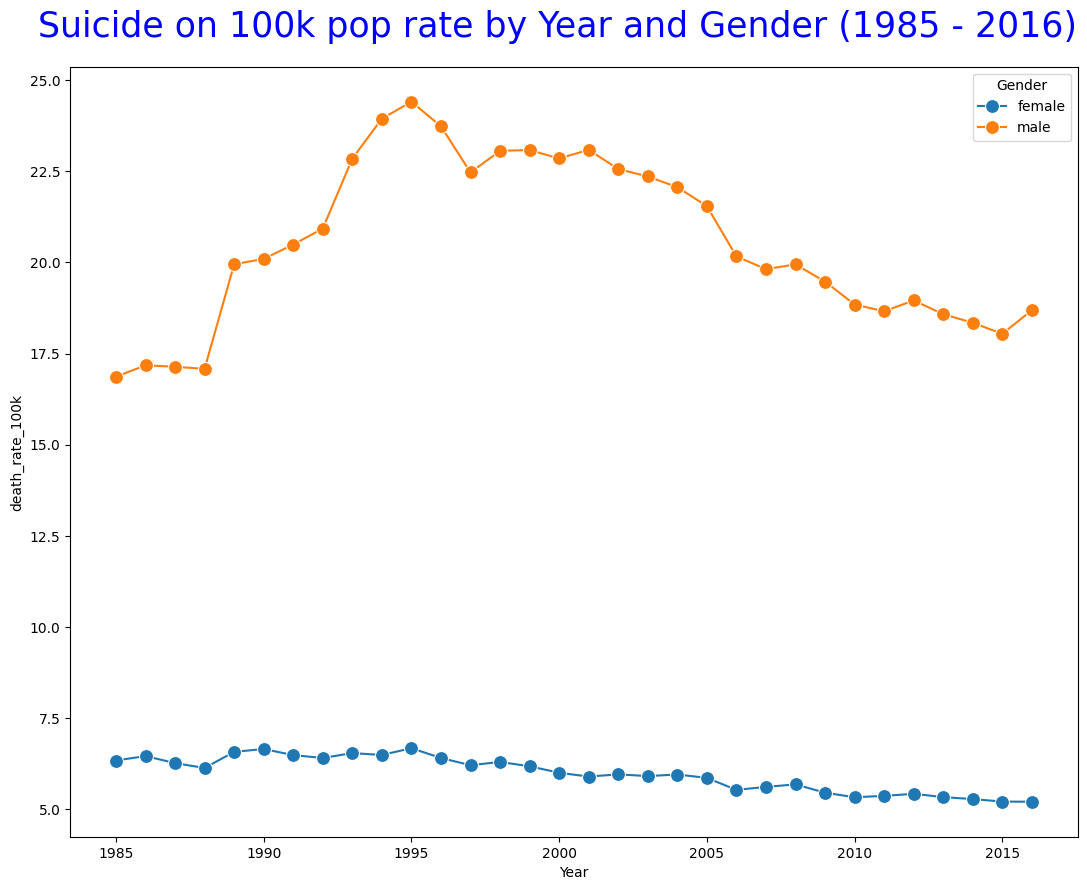

In [ ]:
data_popk_year_gender = df.groupby(by=['Year', 'Gender']).agg({'SuicidesNo':['sum'], 'Population': ['sum']})
data_popk_year_gender.columns = ['total_suicide', 'total_population']
data_popk_year_gender = data_popk_year_gender.reset_index()

# Calculate The Death Rate:
data_popk_year_gender['death_rate_100k'] = data_popk_year_gender['total_suicide'] / data_popk_year_gender['total_population'] * 100000

# Change the size Of The Chart Itself
plt.figure(figsize=(13, 10))


# Setting X, y Axis
sns.lineplot(x="Year", y="death_rate_100k", hue='Gender', marker='o', markersize=10, data=data_popk_year_gender)


# Format Title Of Chart
plt.figtext(.5,.91,'Suicide on 100k pop rate by Year and Gender (1985 - 2016)', color='b', fontsize=25, ha='center')

# Showing Figure
plt.show()


